Current working directory: /Users/lipika.aggarwal/Desktop/programming/WildFire Segmentation/notebooks
Model checkpoint exists: True
Image loaded: True
Output min: -1.2352237701416016 max: -0.01614299789071083


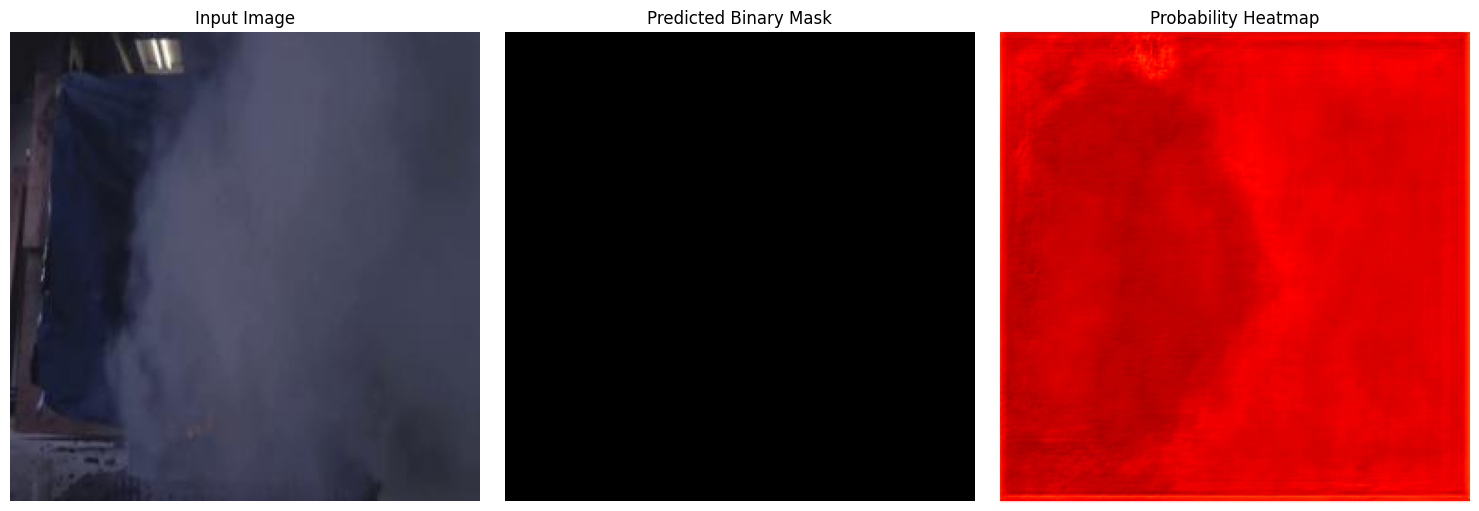

In [10]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
import os

sys.path.append("/Users/lipika.aggarwal/Desktop/programming/WildFire Segmentation")

from model.pretrained_unet import PretrainedUNet

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
model = PretrainedUNet(in_channels=3, activation=None)
model_path = "../checkpoints/best_model.pth"
print("Current working directory:", os.getcwd())
print("Model checkpoint exists:", os.path.exists(model_path))
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# Load and preprocess image
image_path = "../data/fire/images/not_fire/Img_15366.jpg"
image = Image.open(image_path).convert("RGB")
print("Image loaded:", os.path.exists(image_path))

transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
])
input_tensor = transform(image).unsqueeze(0).to(device)

# Inference
with torch.no_grad():
    output = model(input_tensor)
    print("Output min:", output.min().item(), "max:", output.max().item())
    output = torch.sigmoid(output)
    predicted_mask = output.squeeze().cpu().numpy()

    if np.max(predicted_mask) < 0.1:
        predicted_mask[:] = 0

    binary_mask = (predicted_mask > 0.5).astype(np.uint8)

# Plot
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(np.array(image.resize((256, 256))))
plt.axis('off')

# Binary mask
plt.subplot(1, 3, 2)
plt.title("Predicted Binary Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis('off')

# Heatmap of probabilities
plt.subplot(1, 3, 3)
plt.title("Probability Heatmap")
plt.imshow(predicted_mask, cmap="hot", vmin=0, vmax=1)
plt.axis('off')


plt.tight_layout()
plt.show()

